# DSC4001-01 Exercise 11

**This exercise notebook will go through the Data Visualization**

* [Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. It operates on Pandas ``DataFrame`` and arrays.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

## Import

Import ``seaborn`` module under the name ``sns``.

In [ ]:
import seaborn as sns

## Seaborn vs Matplotlib


In [ ]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

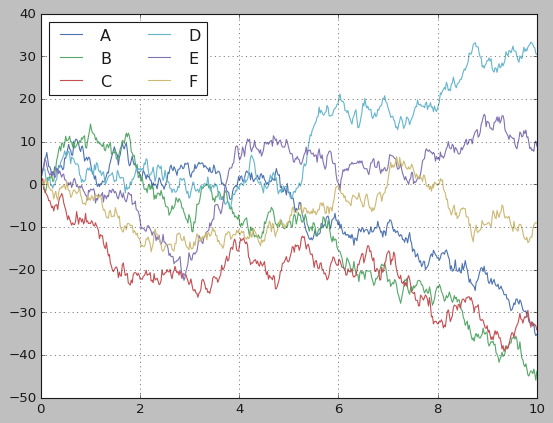

In [ ]:
# Plot the data with Matplotlib 

plt.style.use('classic')

fig = plt.figure()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='best')
plt.grid()
plt.show()

Let's take a look at how the data pottinig works with Seaborn. 

We can set the *style* by calling ``sns.set()`` method. 

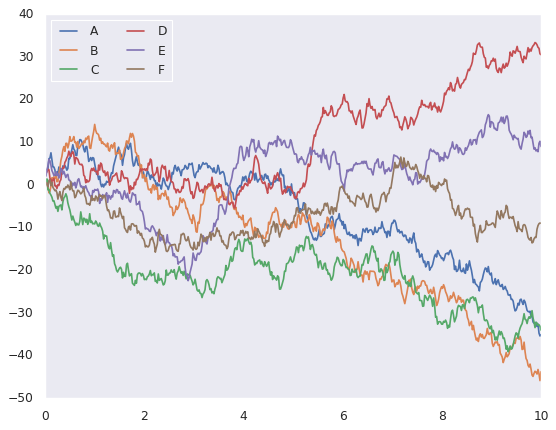

In [ ]:
sns.set()

# same pottinig as above
fig = plt.figure()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='best')
plt.grid()
plt.show()

## Relational plots: `sns.relplot()`

Seaborn is very flexible about data structures - we can handle ``pd.DataFrame``. We will use various datasets from ``sns.load_dataset()``.



In [ ]:
# Load an example dataset

tips = sns.load_dataset('tips')
print(type(tips))
tips

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**``sns.relplot()``**
* figure-level interface for drawing **relational plots**
* visualize many different statistical relationships of variables in the data

  * `kind`: 'scatter' or 'line' 
  * `data`: input data structure
  * `x`,`y`: variables that specify positions on the x, y axes
  * `hue`: grouping variable that will produce elements with different colors 
  * `row`, `col`: variables that define subsets to plot on different facets (as like subplots)
  * `style`: variables that produce elements with different styles: e.g., line style or marker style
  * `size`: variables that produce elements with different sizes: e.g., line width or marker size


Let's create a visualization that diplays statistical relationships between `total_bill` and `tip`, with different colors representing `day` values.

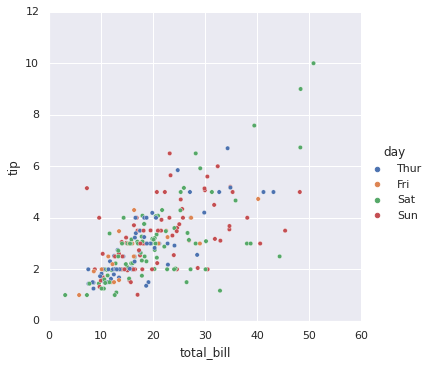

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='day')
plt.show()

Let's create a scatter plot: different colors, marker styles = `smoker` values, different marker sizes = `size` vales, each column representing each `time` value.

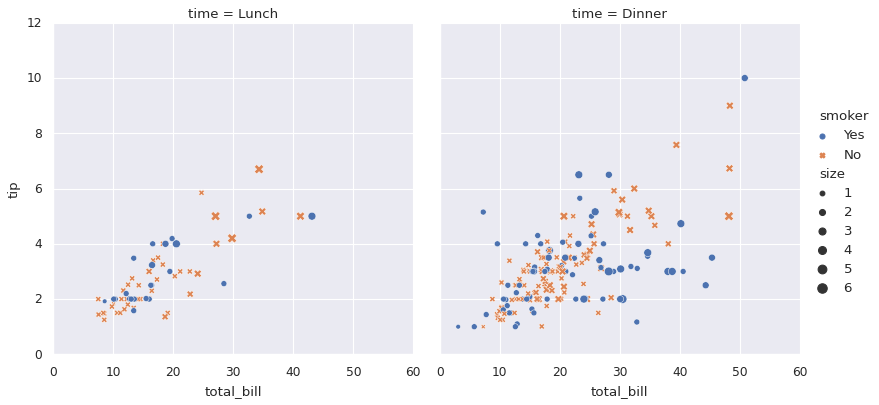

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip', col='time',
    hue='smoker', style='smoker', size='size')
plt.show()

Let's create a line plot with *'dots'* and *'fmri'* datasets.

In [ ]:
dots = sns.load_dataset('dots')
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


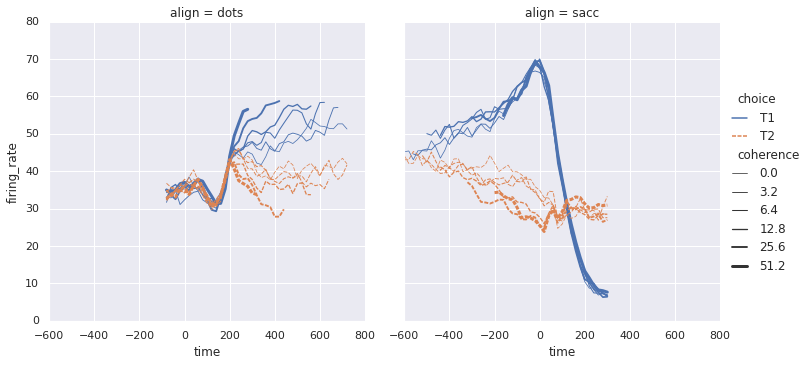

In [ ]:
sns.relplot(data=dots, kind='line',
    x='time', y='firing_rate', col='align',
    hue='choice', size='coherence', style='choice')
plt.show()

Many Seaborn functions automatically perform statistical estimation (e.g., average) that is necessary to answer the questions.


In [ ]:
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


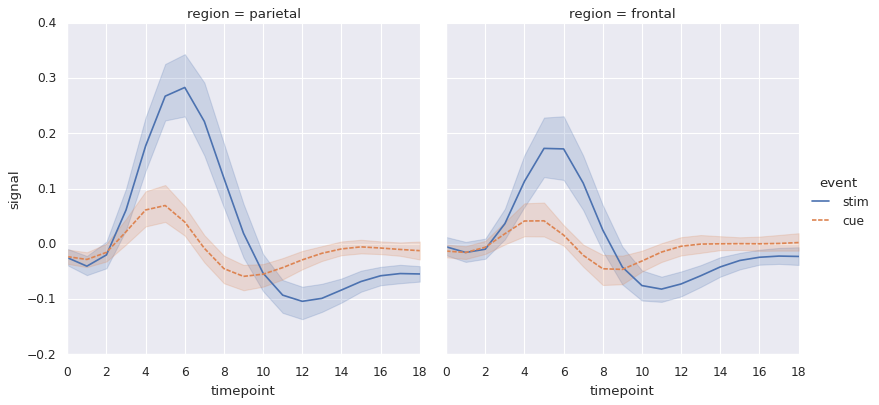

In [ ]:
sns.relplot(data=fmri, kind='line', x='timepoint', y='signal', 
    col='region', hue='event', style='event')
plt.show()

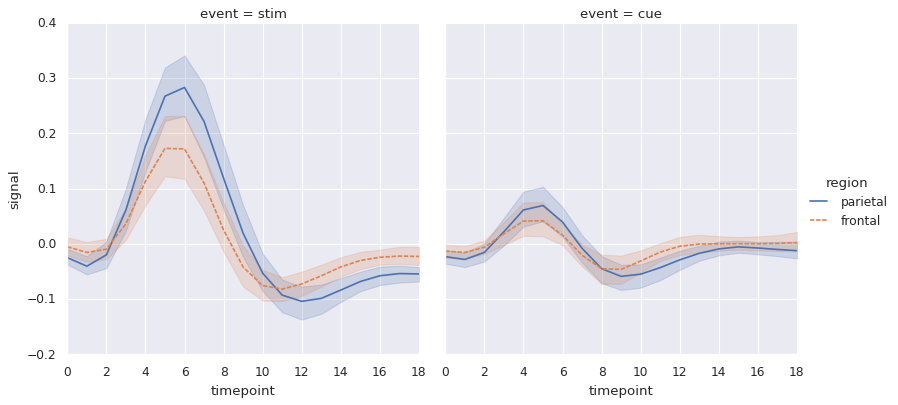

In [ ]:
# quiz
sns.relplot(data=fmri, kind='line', x='timepoint', y='signal', 
            col='event', hue='region', style='region')
plt.show()

## Distributional plots: `sns.displot()`


**``sns.displot()``**
* figure-level interface for drawing **distribution plots**
  * `kind`: 'hist', 'kde', ... 
  * `data`: input data structure
  * `x`: variable that specify positions on the x axis
  * `y`: in case of 2D histogram, it represents a variable that specify positions on the y axis
  * `hue`: grouping variable that will determine the color of plot elements 
  * `row`, `col`: variables that define subsets to plot on different facets (as like subplots)
  * `kde`: True or False: determin to add kernel density estimation line


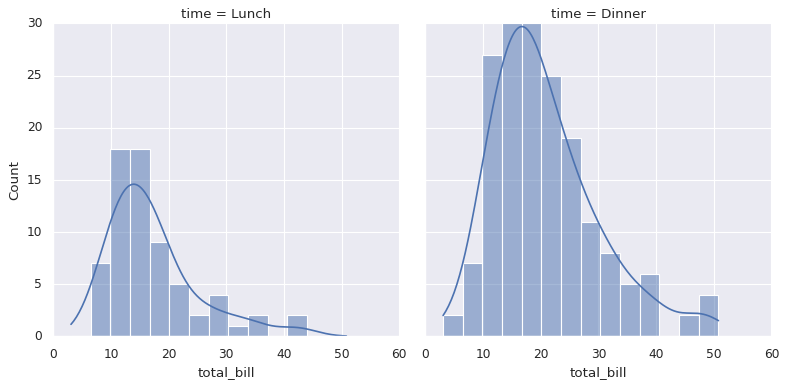

In [ ]:
sns.displot(data=tips, x='total_bill', col='time', kde=True)
plt.show()

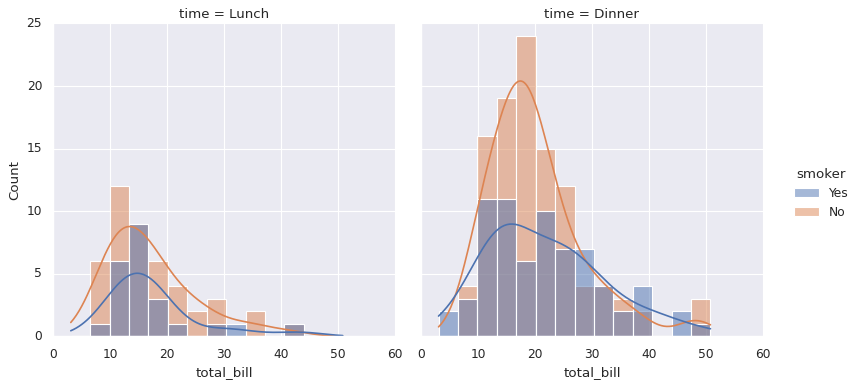

In [ ]:
sns.displot(data=tips, x='total_bill', col='time', hue='smoker', kde=True)
plt.show()

Let's create 2D histogram plots. 


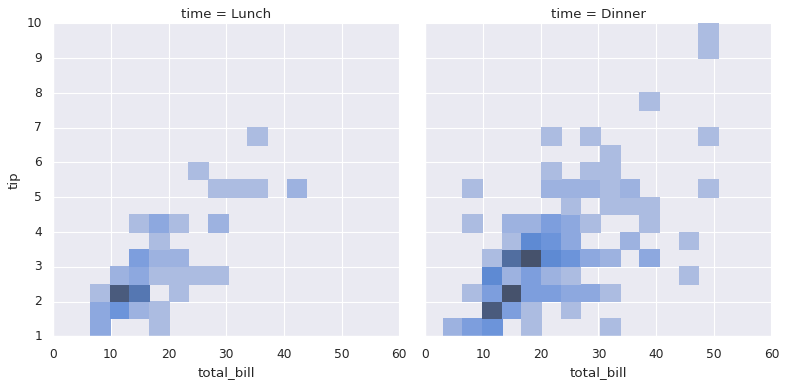

In [ ]:
sns.displot(data=tips, x='total_bill', y='tip', col='time')
plt.show()

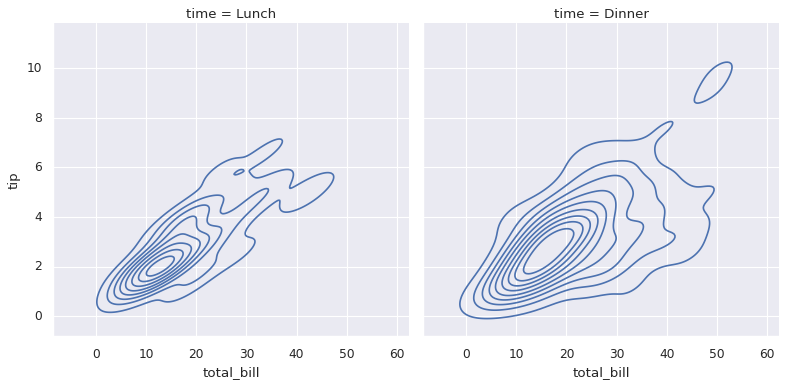

In [ ]:
sns.displot(data=tips, x='total_bill', y='tip', col='time', kind='kde')
plt.show()

**``sns.jointplot()``**

We can see the joint distribution and the marginal distributions together using ``sns.jointplot()``. 

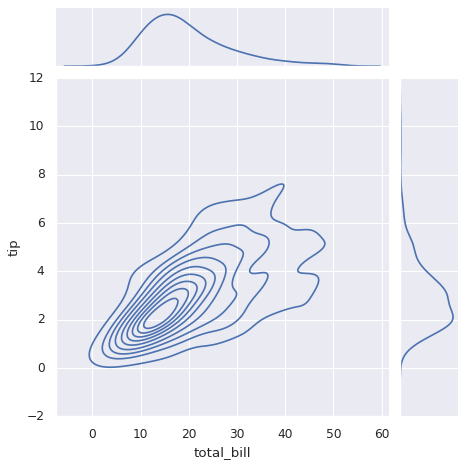

In [ ]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde')
plt.show()

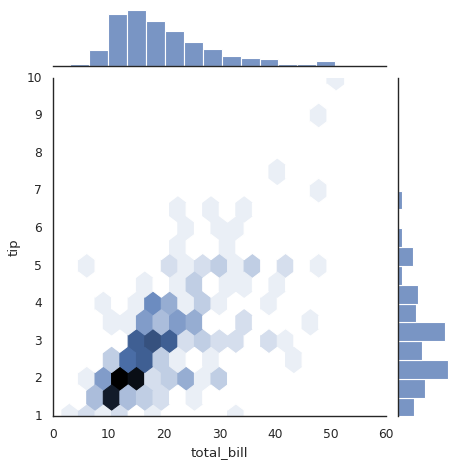

In [ ]:
with sns.axes_style('white'):
  sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.show()

## Plots for categorical data: ``sns.catplot()``

**``sns.catplot()``**
* figure-level interface for drawing **relationship between a numerical and categorical variables**
  * `kind`: 'strip', 'swarm', 'box', 'violin', 'bar', ...  
    * strip: a scatter plot where one variable is categorical 
    * swarm: a catter plot with non-overlapping points
    * box: a box plot to show distributions with respect to categories
    * violin: a combination of boxplot and kernel density estimate
    * bar: point estimates and confidence intervals as rectangular bars


In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


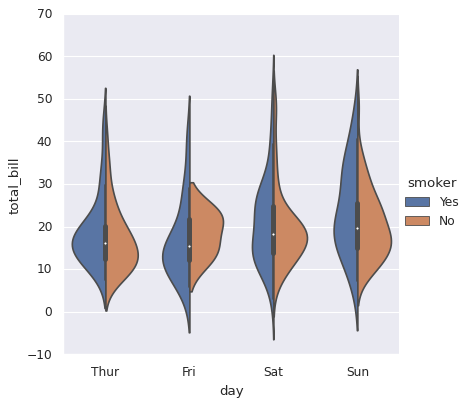

In [ ]:
sns.catplot(data=tips, kind='violin', 
    x='day', y='total_bill', hue='smoker', split=True)
plt.show()

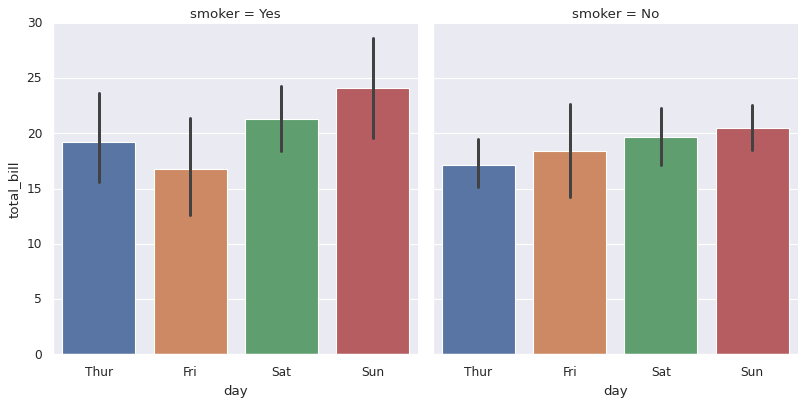

In [ ]:
sns.catplot(data=tips, x='day', y='total_bill', 
    col='smoker', kind='bar')
plt.show()

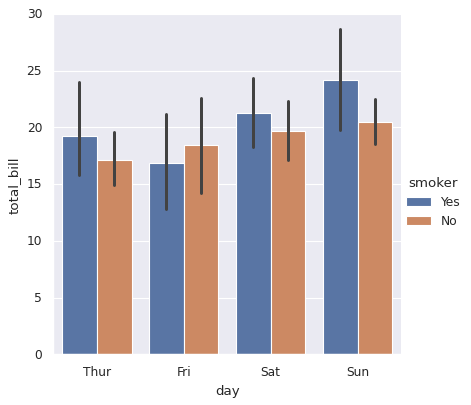

In [ ]:
sns.catplot(data=tips, x='day', y='total_bill',
    hue='smoker', kind='bar')
plt.show()

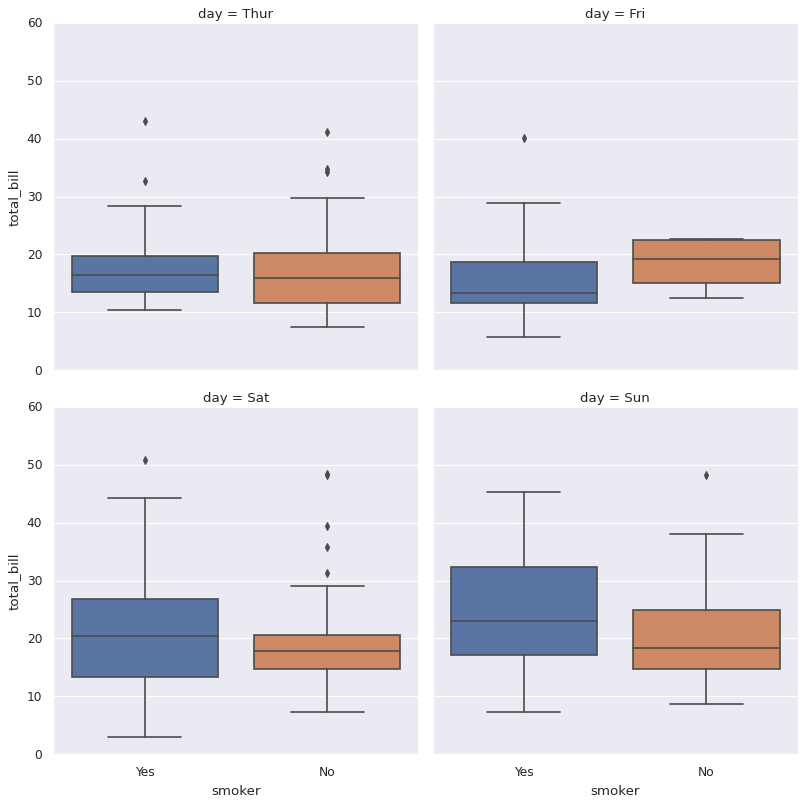

In [ ]:
sns.catplot(data=tips, x='smoker', y='total_bill', 
    col='day', kind='box', col_wrap=2)
plt.show()

## Specialized plots

**Multivariate datasets**

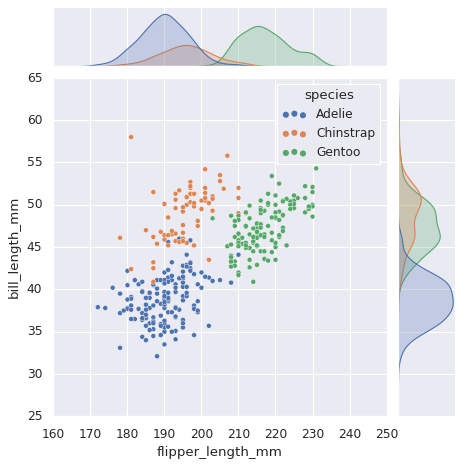

In [ ]:
penguins = sns.load_dataset('penguins')
sns.jointplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', hue='species')
plt.show()

**``sns.catpairplot()``**
* figure-level interface for drawing joint and marginal distributions for **all pairwise relationships** of variables


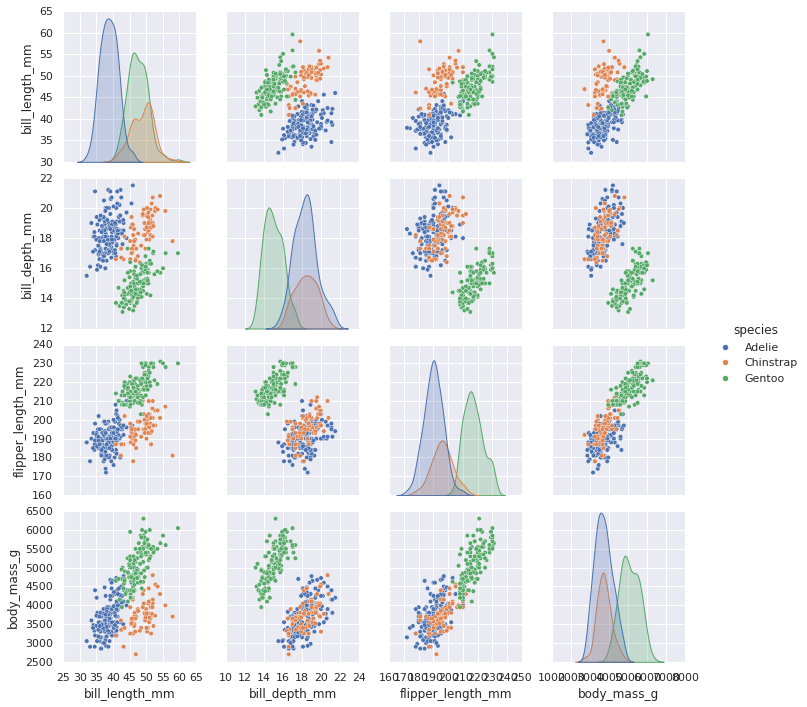

In [ ]:
sns.pairplot(data=penguins, hue='species')
plt.show()

**``sns.heatmap()``**
* figure-level interface for drawing **heatmap** using a colormap
  * `cmap`: a colormap

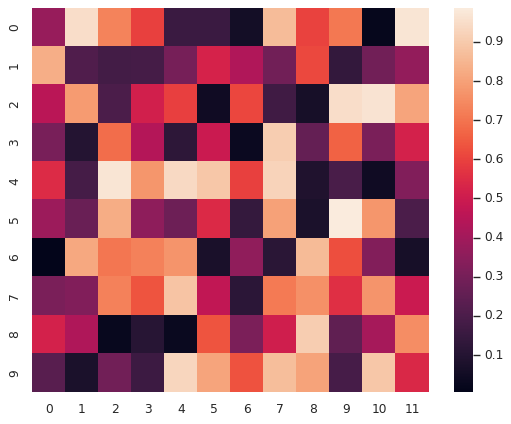

In [ ]:
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data)
plt.show()

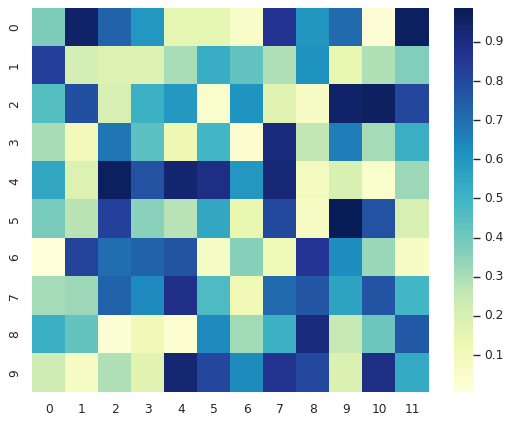

In [ ]:
sns.heatmap(uniform_data, cmap='YlGnBu')
plt.show()

Let's compute correlation coefficients of `tips` data, and draw it using a heatmap

In [ ]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


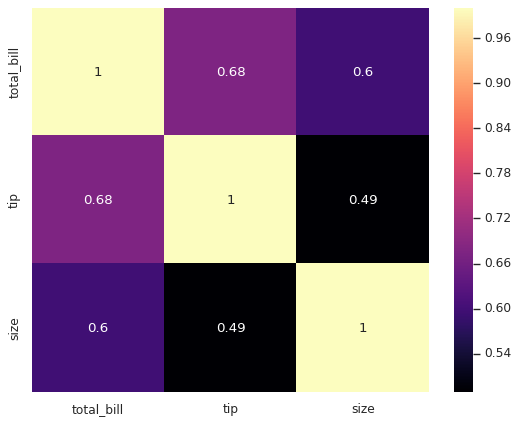

In [ ]:
sns.heatmap(tips.corr(), cmap='magma', annot=True)

## Quiz:


###Quiz 1

Using 'fmri' dataset, create the below line plot:

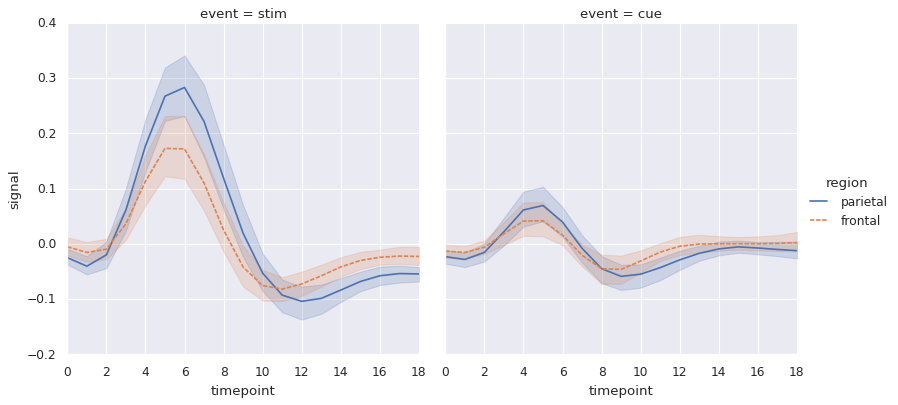

In [ ]:
# create the plot


plt.show()

###Quiz 2

Using 'tips' dataset, create the below 'swarm' plot:

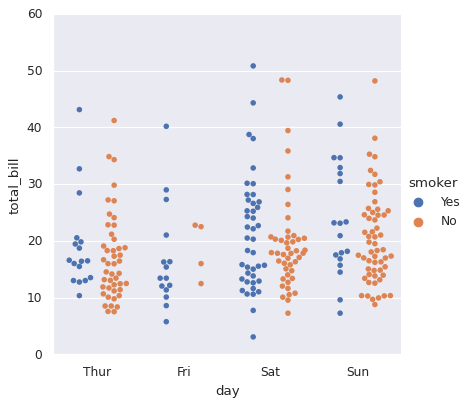

In [ ]:
# your code here


plt.show()

### Quiz 3

Create the below plot using 'tips' dataset:

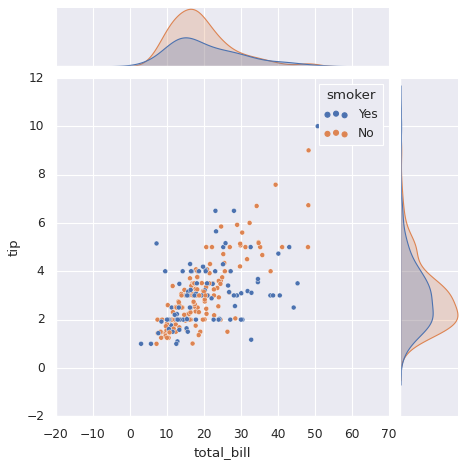

In [ ]:
# your code here


plt.show()

### Quiz 4

Create below box plot using 'tips' dataset:

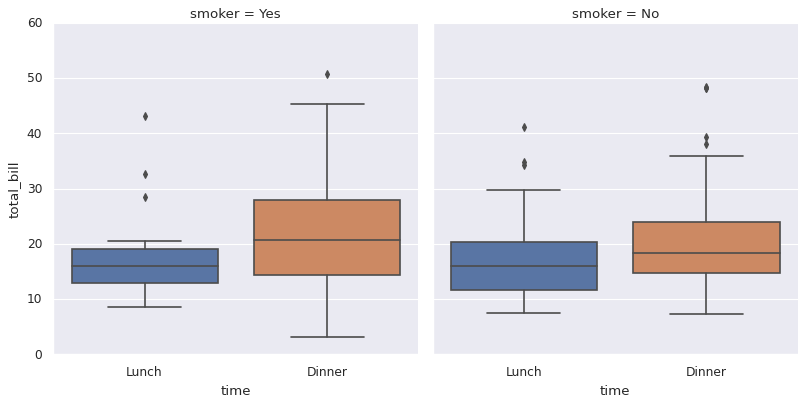

In [ ]:
# your code here


plt.show()

### Quiz 5

Using 'tips' dataset, create below box plot:

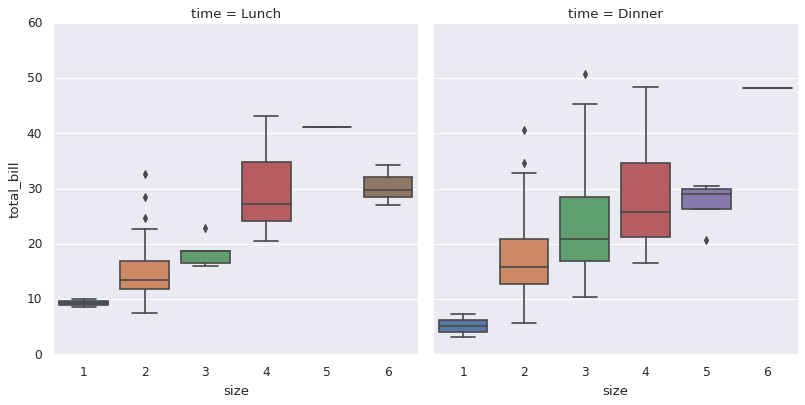

In [ ]:
# your code here


plt.show()